In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading datset into a dataframe

In [2]:
df = pd.read_csv('../../datasets/NewYorkStockExchange/prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Analysis

In [3]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


Applying Feature Transformation on symbol column

In [4]:
df['symbol'].unique()
df['symbol_encoded']= df['symbol'].map(df['symbol'].value_counts())


Applying Feature Engineering on Date column

In [32]:
df['date_str'] = df['date'].astype(str)
df['year'] = (df['date_str'].str.split('-').str[0]).astype(int)
df['month'] = (df['date_str'].str.split('-').str[1]).astype(int)
df['day'] = ((df['date_str'].str.split('-').str[2]).str.split(' ').str[0]).astype(int)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            851264 non-null  object 
 1   symbol          851264 non-null  object 
 2   open            851264 non-null  float64
 3   close           851264 non-null  float64
 4   low             851264 non-null  float64
 5   high            851264 non-null  float64
 6   volume          851264 non-null  float64
 7   symbol_encoded  851264 non-null  int64  
 8   year            851264 non-null  int64  
 9   date_str        851264 non-null  object 
 10  month           851264 non-null  int64  
 11  day             851264 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 77.9+ MB


Dropping unneeded columns

In [39]:
df_copy = df.copy()
df_copy= df_copy.drop(labels=['symbol','date_str','date'],axis=1) 
df_copy

,open,close,low,high,volume,symbol_encoded,year,month,day
0,123.430000,125.839996,122.309998,126.250000,2163600.0,251,2016,1,5
1,125.239998,119.980003,119.940002,125.540001,2386400.0,251,2016,1,6
2,116.379997,114.949997,114.930000,119.739998,2489500.0,251,2016,1,7
3,115.480003,116.620003,113.500000,117.440002,2006300.0,251,2016,1,8
4,117.010002,114.970001,114.089996,117.330002,1408600.0,251,2016,1,11
...,...,...,...,...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0,1762,2016,12,30
851260,43.070000,43.040001,42.689999,43.310001,1938100.0,1762,2016,12,30
851261,53.639999,53.529999,53.270000,53.740002,1701200.0,987,2016,12,30
851262,44.730000,45.450001,44.410000,45.590000,1380900.0,1762,2016,12,30


Analyzing and Preparing Data

<Axes: >

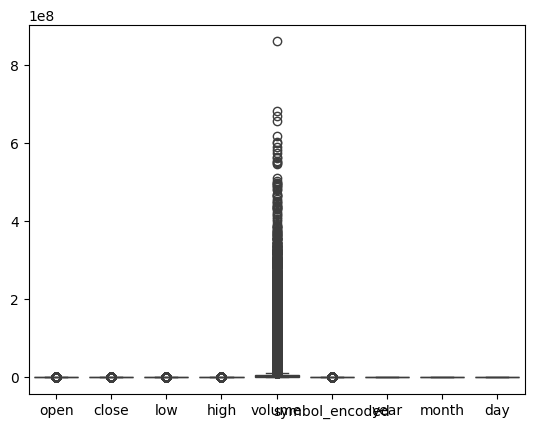

In [43]:
# Identifying outliers by plotting box-plot
sns.boxplot(df_copy)

Removing Outliers from Volume

<Axes: >

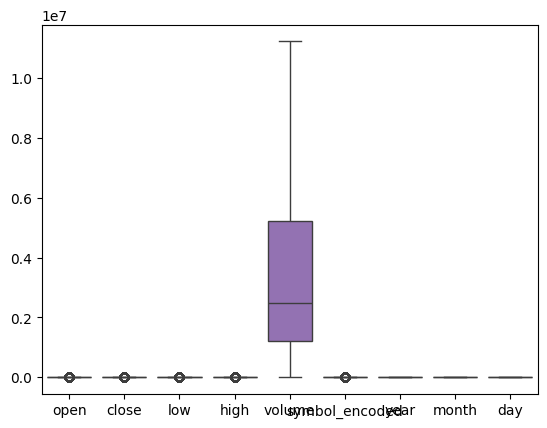

In [47]:
Q1,Q3 = np.quantile(df_copy['volume'],[0.25,0.75]) 
lower_fence = Q1-(1.5*(Q3-Q1))
upper_fence = Q3+(1.5*(Q3-Q1))
df_copy['volume'] = df_copy['volume'].clip(lower=lower_fence,upper=upper_fence) 
sns.boxplot(df_copy)

Checking Distribution 

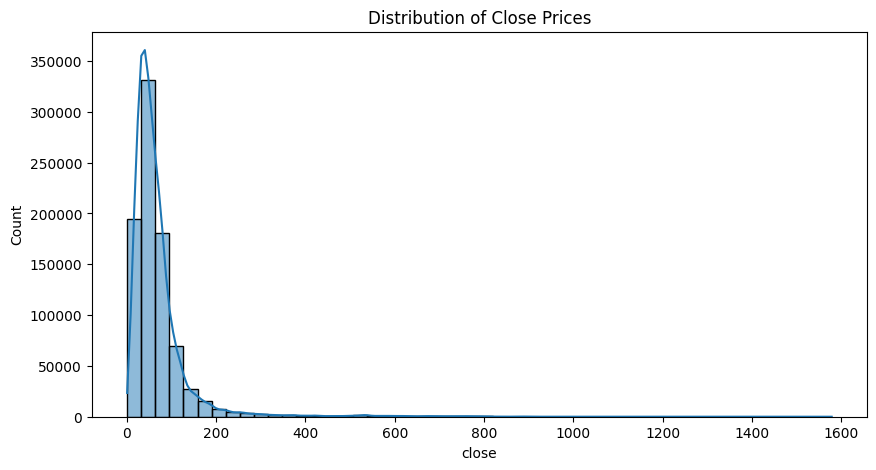

In [ ]:
df_copy['close'].skew()
plt.figure(figsize=(10,5))
sns.histplot(df_copy['close'], bins=50, kde=True)
plt.title("Distribution of Close Prices")
plt.show()


Fixing close column by applying log transformation

In [ ]:
df_copy['close'] = np.log1p(df_copy['close']) 
df_copy['close'].skew()


np.float64(0.23120502667665133)

In [ ]:
df_copy['open'].skew()
plt.figure(figsize=(10,5))
sns.histplot(df_copy['open'], bins=50, kde=True)
plt.title("Distribution of Open Prices")
plt.show()

np.float64(6.656860240576692)

In [ ]:
df_copy['open'] = np.log1p(df_copy['open'])
df_copy['low'] = np.log1p(df_copy['low'])
df_copy['high'] = np.log1p(df_copy['high'])


np.float64(1.1382924661898581)

<Axes: xlabel='volume', ylabel='Count'>

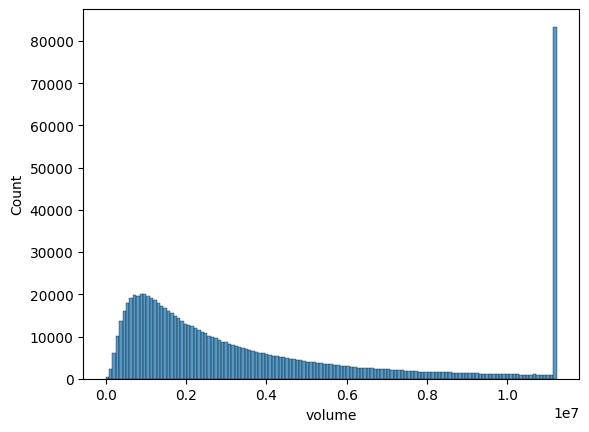

In [60]:
sns.histplot(df_copy['volume'])

In [66]:
df_copy['volume'] = np.log2(df_copy['volume'])
df_copy['volume'].skew()

nan

Analyzing Feature Correlation

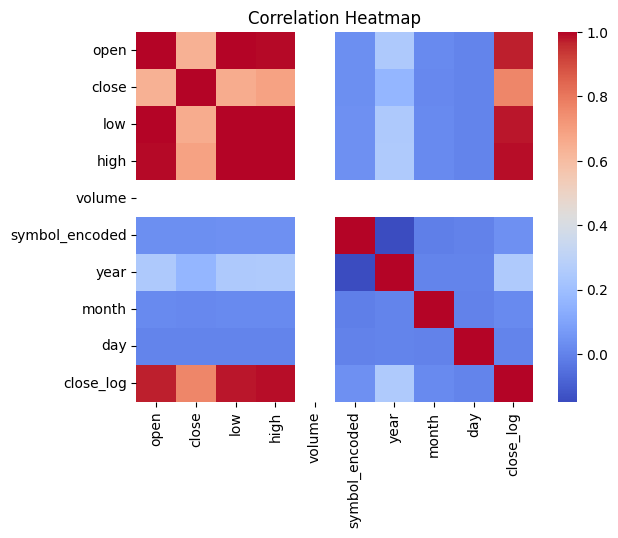

In [71]:
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()